In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
import os
from astropy.table import Table

In [2]:
from read_sfh import get_scales
small_file_fname = "/Users/aphearin/Dropbox/UniverseMachine/data/histories/small_sfh_catalog_1.002310.txt"
scale_factor_array = get_scales(small_file_fname)
cosmic_age_array = np.load('/Users/aphearin/Dropbox/UniverseMachine/data/histories/prelim_sfh_reduction/times.npy')

In [3]:
from collate_full_catalog import collate_catalog
a_string = 'a_1.002310'
idx_tobs_z0 = np.where(scale_factor_array >= float(a_string[2:]))[0][0]
t_today_z0 = cosmic_age_array[idx_tobs_z0]

history_colnames = ('halo_id', 'halo_upid', 'halo_mpeak', 'halo_vmax_at_mpeak', 
                'stellar_mass', 'sfr', 'a_first_infall', 'a_last_infall')
halocat_propnames = ('x', 'y', 'z', 'rvir')
histories_z0 = collate_catalog(a_string, history_colnames=history_colnames, 
                            halocat_propnames=halocat_propnames, verbose=True)
print("Number of galaxies = {0}".format(len(histories_z0)))

histories_z0['ssfr'] = np.log10(histories_z0['sfr']/histories_z0['stellar_mass'])

... Assembling history data
... Assembling halo catalog data
... Cross-matching on halo_id

Number of objects in history catalog = 676028
Number of objects in halo catalog = 12085858
Number of matching objects = 640466
Fraction of objects appearing in both catalogs = 0.947
New colnames to add from halo catalog = ['y', 'x', 'z', 'rvir']

Number of galaxies = 676028


In [4]:
from collate_full_catalog import collate_catalog
a_string = 'a_0.501122'
idx_tobs_z1 = np.where(scale_factor_array >= float(a_string[2:]))[0][0]
t_today_z1 = cosmic_age_array[idx_tobs_z1]

history_colnames = ('halo_id', 'halo_upid', 'halo_mpeak', 'halo_vmax_at_mpeak', 
                'stellar_mass', 'sfr', 'a_first_infall', 'a_last_infall')
halocat_propnames = ('x', 'y', 'z', 'rvir')
histories_z1 = collate_catalog(a_string, history_colnames=history_colnames, 
                            halocat_propnames=halocat_propnames, verbose=True)
print("Number of galaxies = {0}".format(len(histories_z1)))

histories_z1['ssfr'] = np.log10(histories_z1['sfr']/histories_z1['stellar_mass'])

... Assembling history data
... Assembling halo catalog data
... Cross-matching on halo_id

Number of objects in history catalog = 479093
Number of objects in halo catalog = 15954527
Number of matching objects = 443093
Fraction of objects appearing in both catalogs = 0.925
New colnames to add from halo catalog = ['y', 'x', 'z', 'rvir']

Number of galaxies = 479093


In [5]:
from halotools.mock_observables import mean_y_vs_x

ssfr_cut = histories_z1['ssfr'] > -11

logMmin, logMmax, nbins = 11.25, 13.75, 25
logMbins = np.linspace(logMmin, logMmax, nbins)

logx_active_z1, logy_active_z1, logyerr_active_z1 = mean_y_vs_x(np.log10(histories_z1['halo_mpeak'][ssfr_cut]), 
                         np.log10(histories_z1['stellar_mass'][ssfr_cut]), 
                                                      bins=logMbins)
x_active_z1, y_active_z1, yerr_active_z1 = 10**logx_active_z1, 10**logy_active_z1, 10**logyerr_active_z1

logx_quenched_z1, logy_quenched_z1, logyerr_quenched_z1 = mean_y_vs_x(np.log10(histories_z1['halo_mpeak'][~ssfr_cut]), 
                         np.log10(histories_z1['stellar_mass'][~ssfr_cut]), 
                                                      bins=logMbins)
x_quenched_z1, y_quenched_z1, yerr_quenched_z1 = 10**logx_quenched_z1, 10**logy_quenched_z1, 10**logyerr_quenched_z1

logx_all_z1, logy_all_z1, logyerr_all_z1 = mean_y_vs_x(np.log10(histories_z1['halo_mpeak']), 
                         np.log10(histories_z1['stellar_mass']), bins=logMbins)
x_all_z1, y_all_z1, yerr_all_z1 = 10**logx_all_z1, 10**logy_all_z1, 10**logyerr_all_z1

In [6]:
ssfr_cut = histories_z0['ssfr'] > -11

logx_active_z0, logy_active_z0, logyerr_active_z0 = mean_y_vs_x(np.log10(histories_z0['halo_mpeak'][ssfr_cut]), 
                         np.log10(histories_z0['stellar_mass'][ssfr_cut]), 
                                                      bins=logMbins)
x_active_z0, y_active_z0, yerr_active_z0 = 10**logx_active_z0, 10**logy_active_z0, 10**logyerr_active_z0

logx_quenched_z0, logy_quenched_z0, logyerr_quenched_z0 = mean_y_vs_x(np.log10(histories_z0['halo_mpeak'][~ssfr_cut]), 
                         np.log10(histories_z0['stellar_mass'][~ssfr_cut]), 
                                                      bins=logMbins)
x_quenched_z0, y_quenched_z0, yerr_quenched_z0 = 10**logx_quenched_z0, 10**logy_quenched_z0, 10**logyerr_quenched_z0

logx_all_z0, logy_all_z0, logyerr_all_z0 = mean_y_vs_x(np.log10(histories_z0['halo_mpeak']), 
                         np.log10(histories_z0['stellar_mass']), bins=logMbins)
x_all_z0, y_all_z0, yerr_all_z0 = 10**logx_all_z0, 10**logy_all_z0, 10**logyerr_all_z0

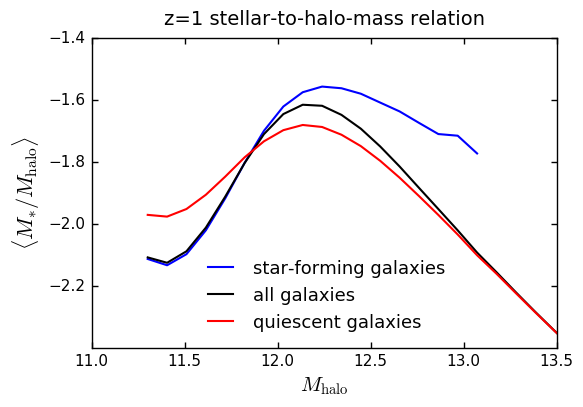

In [103]:
from scipy.signal import medfilt, savgol_filter

fig = plt.figure()
ax = fig.add_subplot(111)

xlabel = ax.set_xlabel(r'$M_{\rm halo}$', fontsize=15)
ylabel = ax.set_ylabel(r'$\langle M_{\ast} / M_{\rm halo}\rangle$', fontsize=16)
title = ax.set_title('z=1 stellar-to-halo-mass relation', fontsize=14, y=1.02) # y param fixes an overhanging title


y1 = np.log10(y_active_z1/x_active_z1)
y1 = savgol_filter(y1, 11, 3)
ax.plot(logx_active_z1, y1, color='blue', label='star-forming galaxies')

y2 = np.log10(y_all_z1/x_all_z1)
y2 = savgol_filter(y2, 11, 3)
ax.plot(logx_all_z1, y2, color='k', label='all galaxies')

y3 = np.log10(y_quenched_z1/x_quenched_z1)
y3 = savgol_filter(y3, 11, 3)
ax.plot(logx_quenched_z1, y3, color='red', label='quiescent galaxies')

plt.xlim(xmin = 11, xmax=13.5)
plt.ylim(ymin = -2.4, ymax = -1.4)

plt.legend(loc='best', fontsize=13)

In [15]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolplanck', redshift=1)

1470957

In [19]:
from halotools.utils import crossmatch
idxA, idxB = crossmatch(histories_z1['halo_id'], halocat.halo_table['halo_id'])

histories_z1['halo_spin'] = np.nan
histories_z1['halo_spin'][idxA] = halocat.halo_table['halo_spin'][idxB]

In [96]:
from halotools.mock_observables import mean_y_vs_x

logMpeak_min, logMpeak_max, nbins = 11, 13.5, 25
bins = np.linspace(logMpeak_min, logMpeak_max, nbins)
orphan_mask = ~np.isnan(histories_z1['halo_spin'])
mpeak_table, spin_table, __ = mean_y_vs_x(np.log10(histories_z1['halo_mpeak'][orphan_mask]), 
                         histories_z1['halo_spin'][orphan_mask], bins=bins)

extrapolated_median_spin = np.interp(np.log10(histories_z1['halo_mpeak']), mpeak_table, spin_table)
histories_z1['low_spin'] = False
low_spin_mask = histories_z1['halo_spin'] < extrapolated_median_spin
histories_z1['low_spin'][low_spin_mask] = True

In [97]:
logx_low_spin_z0, logy_low_spin_z0, logyerr_low_spin_z0 = mean_y_vs_x(np.log10(histories_z1['halo_mpeak'][histories_z1['low_spin']==True]), 
                         np.log10(histories_z1['stellar_mass'][histories_z1['low_spin']==True]), 
                                                      bins=logMbins)
x_low_spin_z0, y_low_spin_z0, yerr_low_spin_z0 = 10**logx_low_spin_z0, 10**logy_low_spin_z0, 10**logyerr_low_spin_z0

logx_high_spin_z0, logy_high_spin_z0, logyerr_high_spin_z0 = mean_y_vs_x(np.log10(histories_z1['halo_mpeak'][histories_z1['low_spin']==False]), 
                         np.log10(histories_z1['stellar_mass'][histories_z1['low_spin']==False]), 
                                                      bins=logMbins)
x_high_spin_z0, y_high_spin_z0, yerr_high_spin_z0 = 10**logx_high_spin_z0, 10**logy_high_spin_z0, 10**logyerr_high_spin_z0

In [98]:
logx_low_spin_z1, logy_low_spin_z1, logyerr_low_spin_z1 = mean_y_vs_x(np.log10(histories_z1['halo_mpeak'][histories_z1['low_spin']==True]), 
                         np.log10(histories_z1['stellar_mass'][histories_z1['low_spin']==True]), 
                                                      bins=logMbins)
x_low_spin_z1, y_low_spin_z1, yerr_low_spin_z1 = 10**logx_low_spin_z1, 10**logy_low_spin_z1, 10**logyerr_low_spin_z1

logx_high_spin_z1, logy_high_spin_z1, logyerr_high_spin_z1 = mean_y_vs_x(np.log10(histories_z1['halo_mpeak'][histories_z1['low_spin']==False]), 
                         np.log10(histories_z1['stellar_mass'][histories_z1['low_spin']==False]), 
                                                      bins=logMbins)
x_high_spin_z1, y_high_spin_z1, yerr_high_spin_z1 = 10**logx_high_spin_z1, 10**logy_high_spin_z1, 10**logyerr_high_spin_z1

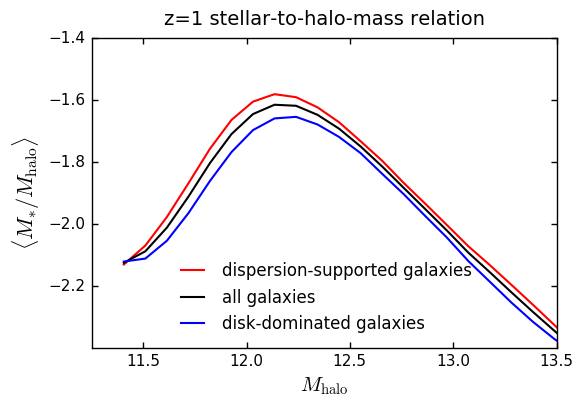

In [102]:
from scipy.signal import medfilt, savgol_filter

fig = plt.figure()
ax = fig.add_subplot(111)

xlabel = ax.set_xlabel(r'$M_{\rm halo}$', fontsize=15)
ylabel = ax.set_ylabel(r'$\langle M_{\ast} / M_{\rm halo}\rangle$', fontsize=16)
title = ax.set_title('z=1 stellar-to-halo-mass relation', fontsize=14, y=1.02) # y param fixes an overhanging title

y1 = np.log10(y_low_spin_z1/x_low_spin_z1)
y1 = savgol_filter(y1, 11, 3)
ax.plot(logx_low_spin_z1[1:], y1[1:], color='red', label='dispersion-supported galaxies')

y1 = np.log10(y_all_z1/x_all_z1)
y1 = savgol_filter(y1, 11, 3)
ax.plot(logx_all_z1[1:], y1[1:], color='k', label='all galaxies')

y1 = np.log10(y_high_spin_z1/x_high_spin_z1)
y1 = savgol_filter(y1, 11, 3)
ax.plot(logx_high_spin_z1[1:], y1[1:], color='blue', label='disk-dominated galaxies')

plt.xlim(xmin = 11.25, xmax=13.5)
plt.ylim(ymin = -2.4, ymax = -1.4)

plt.legend(loc='best', fontsize=12)

In [110]:
q_sph_mask = (histories_z1['low_spin']==True) & (histories_z1['ssfr'] < -11)
logx_q_sph_z1, logy_q_sph_z1, logyerr_q_sph_z1 = mean_y_vs_x(np.log10(histories_z1['halo_mpeak'][q_sph_mask]), 
                         np.log10(histories_z1['stellar_mass'][q_sph_mask]), 
                                                      bins=logMbins)
x_q_sph_z1, y_q_sph_z1, yerr_q_sph_z1 = 10**logx_q_sph_z1, 10**logy_q_sph_z1, 10**logyerr_q_sph_z1

In [105]:
sf_disk_mask = (histories_z1['low_spin']==False) & (histories_z1['ssfr'] > -11)
logx_sf_disk_z1, logy_sf_disk_z1, logyerr_sf_disk_z1 = mean_y_vs_x(np.log10(histories_z1['halo_mpeak'][sf_disk_mask]), 
                         np.log10(histories_z1['stellar_mass'][sf_disk_mask]), 
                                                      bins=logMbins)
x_sf_disk_z1, y_sf_disk_z1, yerr_sf_disk_z1 = 10**logx_sf_disk_z1, 10**logy_sf_disk_z1, 10**logyerr_sf_disk_z1

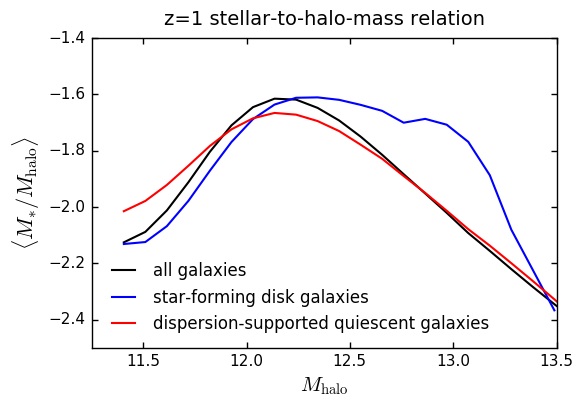

In [116]:
from scipy.signal import medfilt, savgol_filter

fig = plt.figure()
ax = fig.add_subplot(111)

xlabel = ax.set_xlabel(r'$M_{\rm halo}$', fontsize=15)
ylabel = ax.set_ylabel(r'$\langle M_{\ast} / M_{\rm halo}\rangle$', fontsize=16)
title = ax.set_title('z=1 stellar-to-halo-mass relation', fontsize=14, y=1.02) # y param fixes an overhanging title

y1 = np.log10(y_all_z1/x_all_z1)
y1 = savgol_filter(y1, 11, 3)
ax.plot(logx_all_z1[1:], y1[1:], color='k', label='all galaxies')

y1 = np.log10(y_sf_disk_z1[~np.isnan(y_sf_disk_z1)]/x_sf_disk_z1[~np.isnan(y_sf_disk_z1)])
y1 = savgol_filter(y1, 11, 3)
ax.plot(logx_high_spin_z1[~np.isnan(y_sf_disk_z1)][1:], y1[1:], color='blue', label='star-forming disk galaxies')

y1 = np.log10(y_q_sph_z1[~np.isnan(y_q_sph_z1)]/x_q_sph_z1[~np.isnan(y_q_sph_z1)])
y1 = savgol_filter(y1, 11, 3)
ax.plot(logx_q_sph_z1[~np.isnan(y_q_sph_z1)][1:], y1[1:], 
        color='red', label='dispersion-supported quiescent galaxies')

plt.xlim(xmin = 11.25, xmax=13.5)
plt.ylim(ymin = -2.5, ymax = -1.4)

plt.legend(loc='best', fontsize=12)

fig.savefig('FIGS/smhm_star_forming_disks_z1.pdf',
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')